In [1201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1202]:
np.random.seed(42)

In [1233]:
#Generate n synthetic samples (not a real dataset, randomly generated)

n=100 #data pts

#Class 0
X1 = np.random.normal(loc=-2.0, scale=2, size=int(n/2))
Y1 = np.random.normal(loc=0, scale=1, size=int(n/2))
#Class 1
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Y2 = np.random.normal(loc=0, scale=1.0, size=int(n/2))

In [1234]:
# Adds class labels to dataset
ds = np.empty([n, 3])
size = int(n/2)
for i in range(size):
        ds[i] = [X1[i], Y1[i], 0]
        ds[i+size] = [X2[i], Y2[i], 1]

In [1235]:
df = pd.DataFrame({'Dim 1':ds[:, 0], 'Dim 2':ds[:, 1], 'Class label':ds[:, -1]})
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=0)
train_df = pd.DataFrame({'X1':x_train.iloc[:,0], 'X2':x_train.iloc[:,1], 'Y':y_train}, columns=['X1', 'X2', 'Y'])

In [1253]:
def knn(newObservation, referenceData, k=3):
    data = referenceData.iloc[:, :-1]
    labels = referenceData.iloc[:, -1]   
    
    # Gets distances between new data pt and pts in dataset
    rows = data.shape[0]
    cols = data.columns.size
    distances = np.empty((rows, cols))
    
    for i in range(rows):
        sum = 0
        for j in range(cols):
            sum += np.square(data.iloc[i, j] - newObservation[j])
        distance = np.sqrt(sum)
        distances[i, 0] = distance
        distances[i, 1] = labels.iloc[i]
        
    distances = distances[np.argsort(distances[:, 0])]
    
    # Gets k closest neighbors and finds class with neighbors
    num_classes = max(distances[:, 1]) + 1
    classes = [0] * int(num_classes)
    for i in range(k):
        class_num = int(distances[i, 1])
        classes[class_num] = int(classes[class_num])+1
        
    # Returns the class for new data point.
    class_count = max(classes)
    class_index = classes.index(class_count)
    return class_index

In [ ]:
size = x_test.shape[0]

correct_counter = 0

for i in range(size):
    result = knn(x_test.iloc[i], train_df, k=3)
    if result == int(y_test.iloc[i]):
        correct_counter+=1

print(str(correct_counter) + ' correct predictions out of ' + str(size))

    

number of classes : 4.0
class number 3
class number 3
class number 3
number of classes : 4.0
class number 3
class number 3
class number 3
number of classes : 4.0
class number 1
class number 1
class number 1
number of classes : 4.0
class number 2
class number 2
class number 2
number of classes : 4.0
class number 2
class number 2
class number 2
number of classes : 4.0
class number 3
class number 3
class number 3
number of classes : 4.0
class number 0
class number 0
class number 0
number of classes : 4.0
class number 0
class number 0
class number 0
number of classes : 4.0
class number 1
class number 0
class number 0
number of classes : 4.0
class number 2
class number 2
class number 2
number of classes : 4.0
class number 1
class number 1
class number 1
number of classes : 4.0
class number 2
class number 2
class number 2
number of classes : 4.0
class number 3
class number 3
class number 3
number of classes : 4.0
class number 0
class number 0
class number 0
number of classes : 4.0
class numb

Text(0.5, 1.0, 'Actual labels')

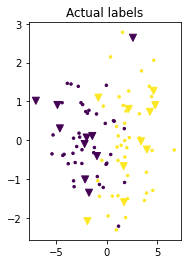

In [1238]:
plt.subplot(1, 2, 1)
plt.scatter(x_train.iloc[:,0], x_train.iloc[:, 1], s=25, c=y_train, marker='.')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1], s=50, c=y_test, marker="v")
plt.title('Actual labels')

Text(0.5, 1.0, 'Predicted labels')

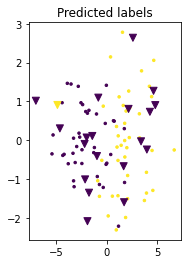

In [1239]:
plt.subplot(1, 2, 2)
plt.scatter(x_train.iloc[:,0], x_train.iloc[:, 1], s=25, c=y_train, marker='.')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1], s=50, c=results, marker="v")
plt.title('Predicted labels')


In [1246]:
#Generate n synthetic samples (not a real dataset, randomly generated)

n=1000 #data pts

#Class 0
X1 = np.random.normal(loc=0, scale=3, size=int(n/4))
Y1 = np.random.normal(loc=-3, scale=1, size=int(n/4))
Z1 = np.random.normal(loc=-1, scale=1, size=(int(n/4)))
#Class 1
X2 = np.random.normal(loc=0, scale=3, size=int(n/4))
Y2 = np.random.normal(loc=1, scale=2, size=int(n/4))
Z2 = np.random.normal(loc=1, scale=1, size=(int(n/4)))
#Class 2
X3 = np.random.normal(loc=0, scale=3, size=int(n/4))
Y3 = np.random.normal(loc=3, scale=1, size=int(n/4))
Z3 = np.random.normal(loc=4, scale=1, size=(int(n/4)))
#Class 3
X4 = np.random.normal(loc=0, scale=3, size=int(n/4))
Y4 = np.random.normal(loc=5, scale=3, size=int(n/4))
Z4 = np.random.normal(loc=-3, scale=1, size=(int(n/4)))


In [1247]:
ds2 = np.empty([n, 4])
size = int(n/4)
for i in range(size):
        ds2[i] = [X1[i], Y1[i], Z1[i], 0]
        ds2[i+size] = [X2[i], Y2[i], Z2[i], 1]
        ds2[i+int(size*2)] = [X3[i], Y3[i], Z3[i], 2]
        ds2[i+int(size*3)] = [X4[i], Y4[i], Z4[i], 3]

df2 = pd.DataFrame({'Dim1':ds2[:, 0], 'Dim2':ds2[:, 1], 'Dim3':ds2[:, 2], 'Class':ds2[:, 3]})


In [1248]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], test_size=.2, random_state=0)


In [1249]:
train_df2 = pd.DataFrame({'X1':x_train.iloc[:,0], 'X2':x_train.iloc[:,1], 'X3':x_train.iloc[:,2], 'Y':y_train}, columns=['X1', 'X2', 'X3', 'Y'])

In [1252]:
size = x_test.shape[0]

correct_counter = 0

for i in range(size):
    result = knn(x_test.iloc[i], train_df2, k=3)
    print('Actual ' + str(result))
    print('Expected ' + str(y_test.iloc[i]))
    print()
    if result == int(y_test.iloc[i]):
        correct_counter+=1

print(str(correct_counter) + ' correct predictions out of ' + str(size))

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 1
class number 1
class number 1
Actual 1
Expected 1.0

number of classes : 4.0
class number 2
class number 2
class number 2
Actual 2
Expected 2.0

number of classes : 4.0
class number 2
class number 2
class number 2
Actual 2
Expected 2.0

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 0
class number 0
class number 0
Actual 0
Expected 0.0

number of classes : 4.0
class number 0
class number 0
class number 0
Actual 0
Expected 0.0

number of classes : 4.0
class number 1
class number 0
class number 0
Actual 0
Expected 1.0

number of classes : 4.0
class number 2
class number 2
class number 2
Actual 2
Expected 2.0

number of classes : 4.0
class number 1
class number 1
class number 1
Actual 1
Ex

number of classes : 4.0
class number 2
class number 2
class number 2
Actual 2
Expected 1.0

number of classes : 4.0
class number 1
class number 1
class number 2
Actual 1
Expected 1.0

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 1
class number 1
class number 1
Actual 1
Expected 1.0

number of classes : 4.0
class number 2
class number 2
class number 2
Actual 2
Expected 2.0

number of classes : 4.0
class number 1
class number 1
class number 1
Actual 1
Expected 1.0

number of classes : 4.0
class number 2
class number 2
class number 2
Actual 2
Expected 2.0

number of classes : 4.0
class number 0
class number 0
class number 0
Actual 0
Expected 0.0

number of classes : 4.0
class number 1
class number 0
class number 1
Actual 1
Expected 1.0

number of classes : 4.0
class number 2
class number 2
class number 2
Actual 2
Expected 2.0

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Ex

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 1
class number 1
class number 1
Actual 1
Expected 1.0

number of classes : 4.0
class number 1
class number 3
class number 3
Actual 3
Expected 1.0

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 2
class number 2
class number 2
Actual 2
Expected 2.0

number of classes : 4.0
class number 1
class number 1
class number 1
Actual 1
Expected 1.0

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 0
class number 0
class number 0
Actual 0
Expected 0.0

number of classes : 4.0
class number 0
class number 3
class number 3
Actual 3
Expected 3.0

number of classes : 4.0
class number 3
class number 3
class number 3
Actual 3
Ex